In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.pyplot import MultipleLocator

In [3]:
### Load data

In [4]:
pX = pd.read_csv('./Flash/X.csv')
# Drop the time stamp column
pY = pd.read_csv('./Flash/Y.csv')

In [5]:
ppc = pd.read_csv('./Flash/read_p_c.csv')
ppc_f= ppc.iloc[0:,0].tolist()
ptb = pd.read_csv('./Flash/read_t_b.csv')
ptb_f= ptb.iloc[0:,0].tolist()
parr = pd.read_csv('./Flash/read_arr.csv')
parr_f= parr.iloc[0:,0].tolist()

In [6]:
pX_features = list(pX.columns)
pX_features.remove('TimeStamp')
pX_ = pX[pX_features]

In [134]:
### PCA

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA()
pX_std = StandardScaler().fit_transform(pX_)
pX_std_pca = pca.fit_transform(pX_std)[:,:2]

In [9]:
### get random points to visulize

In [10]:
def getRandomIndex(n, x):
    index = np.random.choice(np.arange(n), size=x, replace=False)
    return index

In [11]:
visualize_index = np.array(getRandomIndex(pX.shape[0], 100))
visualize_index=np.sort(visualize_index)

In [12]:
### Analyse the target value

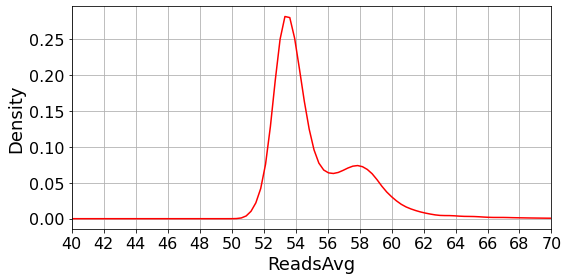

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

pY['ReadsAvg'].plot.kde(ax=axes,ind=np.linspace(40,70,100),color='r');
#X['tps'].plot.kde(ax=axes,ind=np.linspace(0,120,200),color='r');

# Customizing plot (changing font size, labels)
font_size=18
axes.set_xlabel('ReadsAvg', fontsize=font_size)
axes.set_ylabel('Density', fontsize=font_size)
axes.tick_params(axis='both', which='major', labelsize=font_size-2)
axes.tick_params(axis='both', which='minor', labelsize=font_size-4)

x_major_locator=MultipleLocator(2)
y_major_locator=MultipleLocator(0.05)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
axes.grid(True)
plt.xlim([40, 70])
plt.tight_layout()
#plt.savefig(r"\kth course\network analytics\project\pic\1.3.c1.png",dpi=300)

In [14]:
per_25=np.percentile(pY['ReadsAvg'], 25)
per_50=np.percentile(pY['ReadsAvg'], 50)
per_75=np.percentile(pY['ReadsAvg'], 75)

### Explaination

In [15]:
# The density plot of the target shows that 54 is a turning point
#,which can be used as the threshold for classification

In [16]:
pY_sample=np.array(pY.iloc[visualize_index,:]['ReadsAvg'])
turning=55.2
for i in range(0,len(pY_sample)):
    if pY_sample[i]<per_25:
        pY_sample[i]=1
    elif pY_sample[i]<per_50:
        pY_sample[i]=2
    elif pY_sample[i]<per_75:
        pY_sample[i]=3
    else:
        pY_sample[i]=4
pY_sample=pY_sample.astype(int)

In [17]:
pX_pca_sample=pX_std_pca[visualize_index,:]
pX_pc_sample=np.array(pX.iloc[visualize_index,:][ppc_f[0:2]])
pX_tb_sample=np.array(pX.iloc[visualize_index,:][ptb_f[0:2]])
pX_arr_sample=np.array(pX.iloc[visualize_index,:][parr_f[0:2]])

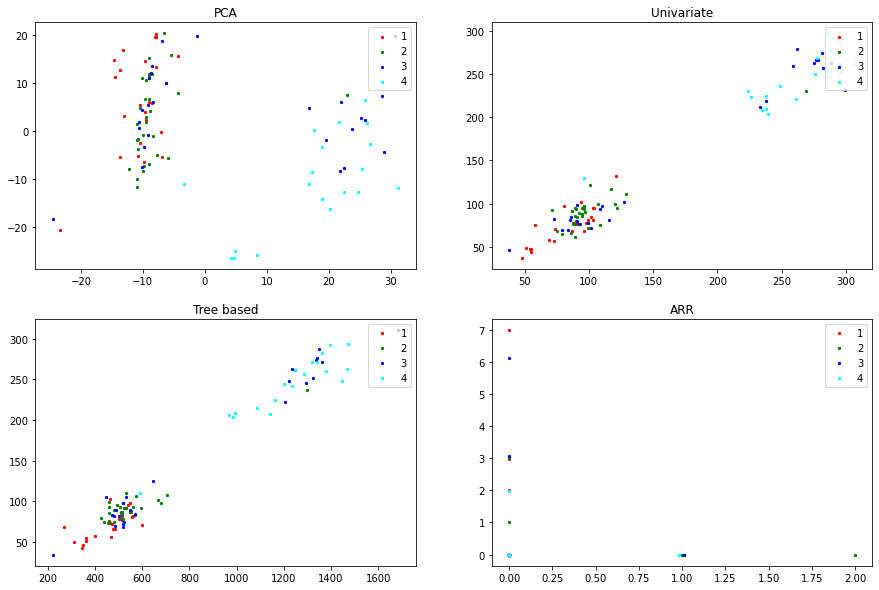

In [19]:
cdict = {1:'red',2:'green',3:'blue',4:'cyan'}
pointsize=5
f, ax = plt.subplots(2,2,figsize=(15,10))
ax1=ax[0,0]
ax2=ax[0,1]
ax3=ax[1,0]
ax4=ax[1,1]

for g in np.unique(pY_sample):
    idx = np.where(pY_sample == g)
    ax1.scatter(pX_pca_sample[idx,0], pX_pca_sample[idx,1], c = cdict[g],label = g, s=pointsize)
ax1.legend(loc="upper right")
ax1.set_title('PCA')

for g in np.unique(pY_sample):
    idx = np.where(pY_sample == g)
    ax2.scatter(pX_pc_sample[idx,0], pX_pc_sample[idx,1], c = cdict[g], label = g,s=pointsize)
ax2.legend(loc="upper right")
ax2.set_title('Univariate')

for g in np.unique(pY_sample):
    idx = np.where(pY_sample == g)
    ax3.scatter(pX_tb_sample[idx,0], pX_tb_sample[idx,1], c = cdict[g], label = g,s=pointsize)
ax3.legend(loc="upper right")
ax3.set_title('Tree based')

for g in np.unique(pY_sample):
    idx = np.where(pY_sample == g)
    ax4.scatter(pX_arr_sample[idx,0], pX_arr_sample[idx,1], c = cdict[g], label = g,s=pointsize)
ax4.legend(loc="upper right")
ax4.set_title('ARR')
plt.savefig("./Fig/flash.png",dpi=300,bbox_inches='tight')
plt.show()

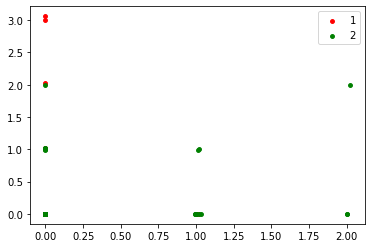

In [145]:
fig, ax = plt.subplots()
for g in np.unique(pY_sample):
    idx = np.where(pY_sample == g)
    ax.scatter(pX_arr_sample[idx,0], pX_arr_sample[idx,1], c = cdict[g], label = g,s=15)
ax.legend(loc="upper right")
#plt.savefig("./Fig/pca.png",dpi=300,bbox_inches='tight')
plt.show()

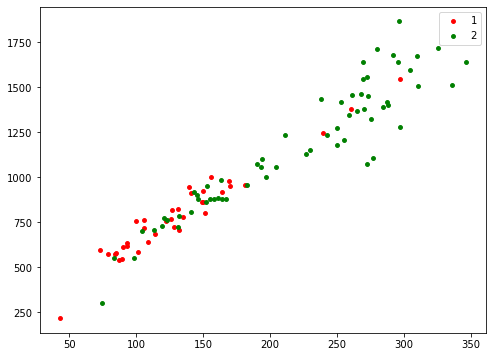

In [82]:
fig, ax = plt.subplots()
for g in np.unique(pY_sample):
    idx = np.where(pY_sample == g)
    ax.scatter(pX_pc_sample[idx,0], pX_pc_sample[idx,1], c = cdict[g], label = g,s=15)
ax.legend(loc="upper right")
#plt.savefig("./Fig/pca.png",dpi=300,bbox_inches='tight')
plt.show()

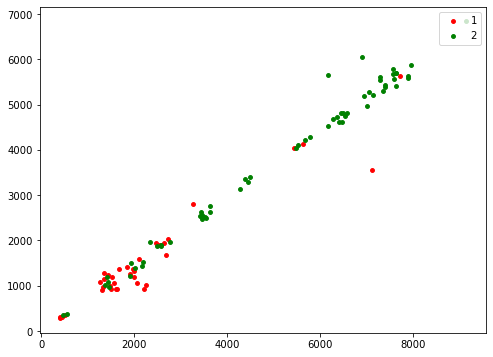

In [83]:
fig, ax = plt.subplots()
for g in np.unique(pY_sample):
    idx = np.where(pY_sample == g)
    ax.scatter(pX_tb_sample[idx,0], pX_tb_sample[idx,1], c = cdict[g], label = g,s=15)
ax.legend(loc="upper right")
#plt.savefig("./Fig/pca.png",dpi=300,bbox_inches='tight')
plt.show()